In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

plt.rc('font',family = 'serif')
plt.rcParams["mathtext.fontset"] = "cm"


def get_file(filename_):
    with open(filename_, "r") as file:
        file_content = file.readlines()
    df = pd.DataFrame(file_content, columns=['data'])
    return df

In [4]:
! ls

'Process RDF.ipynb'   RDFl13p5n4.dat   RDFl3p5n4.dat


In [ ]:
! code RDF_Hydrated_Bulk_Nafion.dat

### Relationships

```
mass  1     12.011000 
mass  2     12.011000 
mass  3     18.998400 
mass  4     15.999400 
mass  5     32.060000 
mass  6     1.008     
mass  7     15.999400 
mass  8     1.008     
mass  9     15.999400 
mass  10    12.011000  
mass  11    12.011000  
mass  12    12.011000  
mass  13    15.999400 

compute myRDF all rdf 200 5 5 5 7 5 9 5 11 3 11 cutoff 15
fix myat1 all ave/time 10 4000 50000 c_myRDF[*] file RDFl13p5n4.dat mode vector
```

In [7]:
cols  = ["bin","r","RDF S-S","CRD S-S","RDF S-Ow","CDF S-Ow","RDF S-Oh"
         ,"CDF S-O","RDF S-Cb", "CDF S-Cb", "RDF F-Cb", "CDF F-Cb"]
λ13p5 = pd.read_csv("RDFl13p5n4.dat", skiprows=4, header=None, sep=" ")
λ3p5 = pd.read_csv("RDFl3p5n4.dat", skiprows=4, header=None, sep=" ")
λ3p5.columns = cols; λ13p5.columns = cols

In [9]:
λ13p5 = λ13p5[λ13p5["r"] <= 15].copy()
λ3p5 = λ3p5[λ3p5["r"] <= 15].copy()

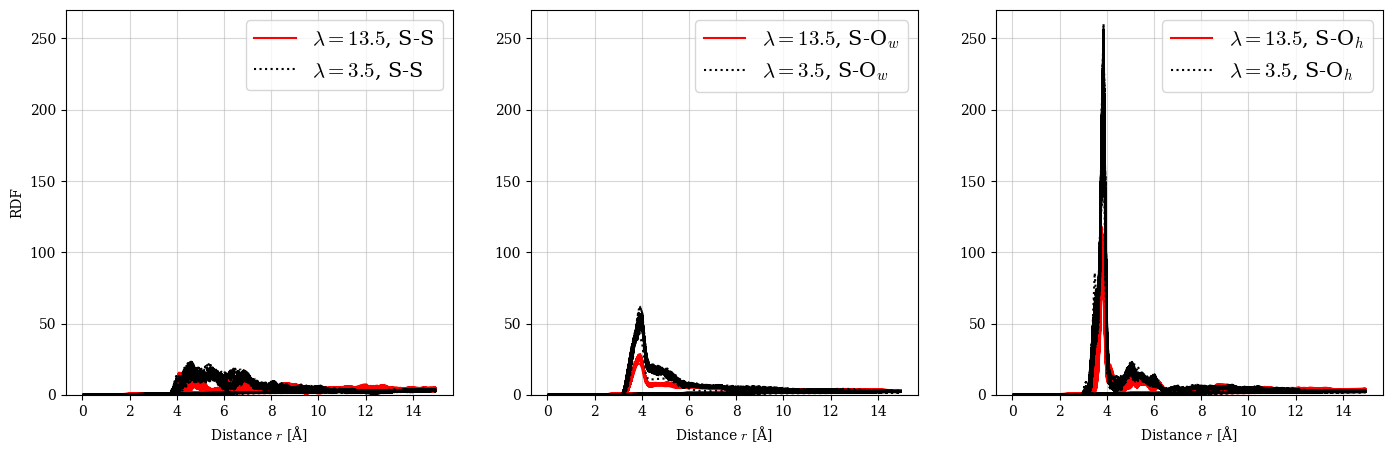

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

upper_limit_y = 270

ax[0].plot(λ13p5["r"], λ13p5["RDF S-S"], c="red", label = "$\lambda=13.5$, S-S")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=15)
ax[0].set_ylim([-0.1, upper_limit_y])
ax[0].grid(alpha=0.5)

ax[0].plot(λ3p5["r"], λ3p5["RDF S-S"], c="k", ls=":", label = "$\lambda=3.5$, S-S")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=15)
ax[0].set_ylim([-0.1, upper_limit_y])
ax[0].grid(alpha=0.5)

ax[1].plot(λ13p5["r"], λ13p5["RDF S-Ow"], c="red", label = "$\lambda=13.5$, S-O$_w$")
ax[1].set_xlabel("Distance $r$ [Å]")
ax[1].legend(loc="upper right", fontsize=15)
ax[1].set_ylim([-0.1, upper_limit_y])
ax[1].grid(alpha=0.5)

ax[1].plot(λ3p5["r"], λ3p5["RDF S-Ow"], c="k", ls=":", label = "$\lambda=3.5$, S-O$_w$")
ax[1].set_xlabel("Distance $r$ [Å]")
ax[1].legend(loc="upper right", fontsize=15)
ax[1].set_ylim([-0.1, upper_limit_y])
ax[1].grid(alpha=0.5)

ax[2].plot(λ13p5["r"], λ13p5["RDF S-Oh"], c="red", label = "$\lambda=13.5$, S-O$_h$")
ax[2].set_xlabel("Distance $r$ [Å]")
ax[2].legend(loc="upper right", fontsize=15)
ax[2].set_ylim([-0.1, upper_limit_y])
ax[2].grid(alpha=0.5)

ax[2].plot(λ3p5["r"], λ3p5["RDF S-Oh"], c="k", ls=":", label = "$\lambda=3.5$, S-O$_h$")
ax[2].set_xlabel("Distance $r$ [Å]")
ax[2].legend(loc="upper right", fontsize=15)
ax[2].set_ylim([-0.1, upper_limit_y])
ax[2].grid(alpha=0.5)

plt.show()

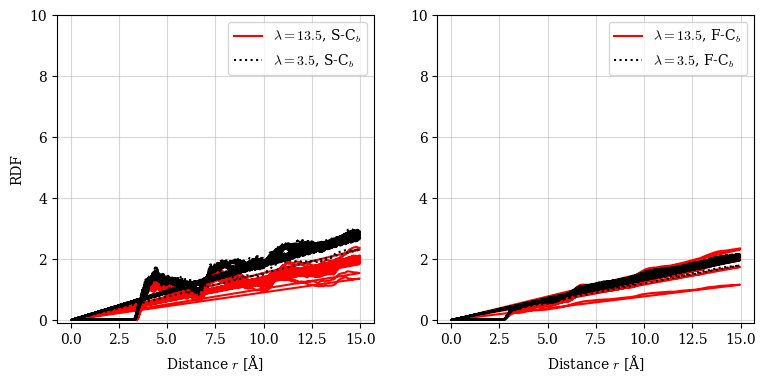

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

upper_limit_y = 10

ax[0].plot(λ13p5["r"], λ13p5["RDF S-Cb"], c="red", label = "$\lambda=13.5$, S-C$_b$")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=10)
ax[0].set_ylim([-0.1, upper_limit_y])
ax[0].grid(alpha=0.5)

ax[0].plot(λ3p5["r"], λ3p5["RDF S-Cb"], c="k", ls=":", label = "$\lambda=3.5$, S-C$_b$")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=10)
ax[0].set_ylim([-0.1, upper_limit_y])
ax[0].grid(alpha=0.5)

ax[1].plot(λ13p5["r"], λ13p5["RDF F-Cb"], c="red", label = "$\lambda=13.5$, F-C$_b$")
ax[1].set_xlabel("Distance $r$ [Å]")
ax[1].legend(loc="upper right", fontsize=10)
ax[1].set_ylim([-0.1, upper_limit_y])
ax[1].grid(alpha=0.5)

ax[1].plot(λ3p5["r"], λ3p5["RDF F-Cb"], c="k", ls=":", label = "$\lambda=3.5$, F-C$_b$")
ax[1].set_xlabel("Distance $r$ [Å]")
ax[1].legend(loc="upper right", fontsize=10)
ax[1].set_ylim([-0.1, upper_limit_y])
ax[1].grid(alpha=0.5)

plt.show()

In [36]:
len(df[df["bin"] == 1])

51

In [37]:
λ13p5_ = λ13p5.groupby("bin").mean()
λ3p5_ = λ3p5.groupby("bin").mean()

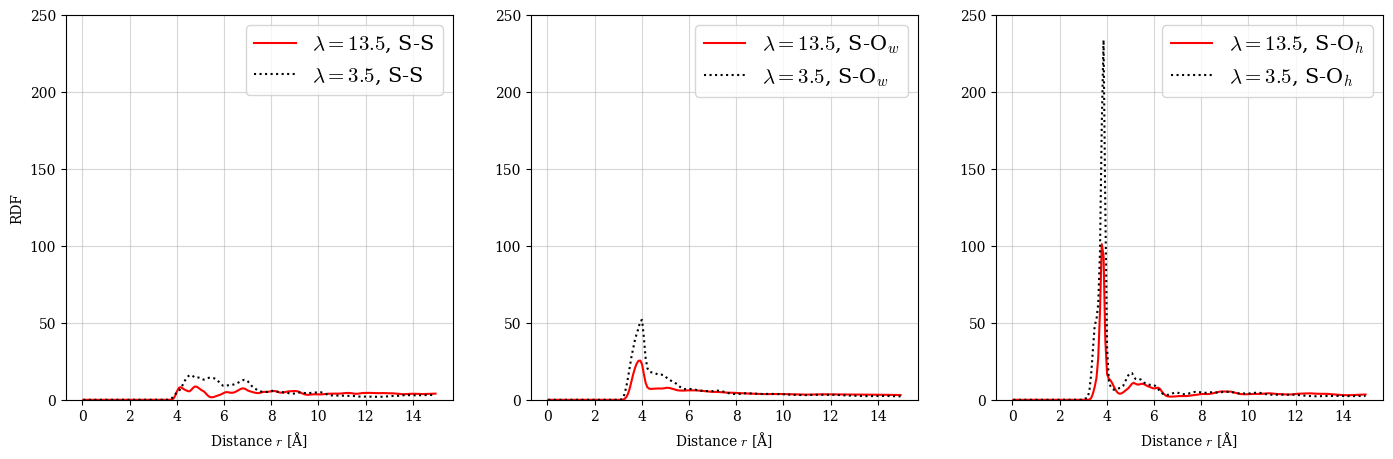

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

upper_limit_y = 250

ax[0].plot(λ13p5_["r"], λ13p5_["RDF S-S"], c="red", label = "$\lambda=13.5$, S-S")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=15)
ax[0].set_ylim([-0.1, upper_limit_y])
ax[0].grid(alpha=0.5)

ax[0].plot(λ3p5_["r"], λ3p5_["RDF S-S"], c="k", ls=":", label = "$\lambda=3.5$, S-S")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=15)
ax[0].set_ylim([-0.1, upper_limit_y])
ax[0].grid(alpha=0.5)

ax[1].plot(λ13p5_["r"], λ13p5_["RDF S-Ow"], c="red", label = "$\lambda=13.5$, S-O$_w$")
ax[1].set_xlabel("Distance $r$ [Å]")
ax[1].legend(loc="upper right", fontsize=15)
ax[1].set_ylim([-0.1, upper_limit_y])
ax[1].grid(alpha=0.5)

ax[1].plot(λ3p5_["r"], λ3p5_["RDF S-Ow"], c="k", ls=":", label = "$\lambda=3.5$, S-O$_w$")
ax[1].set_xlabel("Distance $r$ [Å]")
ax[1].legend(loc="upper right", fontsize=15)
ax[1].set_ylim([-0.1, upper_limit_y])
ax[1].grid(alpha=0.5)

ax[2].plot(λ13p5_["r"], λ13p5_["RDF S-Oh"], c="red", label = "$\lambda=13.5$, S-O$_h$")
ax[2].set_xlabel("Distance $r$ [Å]")
ax[2].legend(loc="upper right", fontsize=15)
ax[2].set_ylim([-0.1, upper_limit_y])
ax[2].grid(alpha=0.5)

ax[2].plot(λ3p5_["r"], λ3p5_["RDF S-Oh"], c="k", ls=":", label = "$\lambda=3.5$, S-O$_h$")
ax[2].set_xlabel("Distance $r$ [Å]")
ax[2].legend(loc="upper right", fontsize=15)
ax[2].set_ylim([-0.1, upper_limit_y])
ax[2].grid(alpha=0.5)

plt.show()

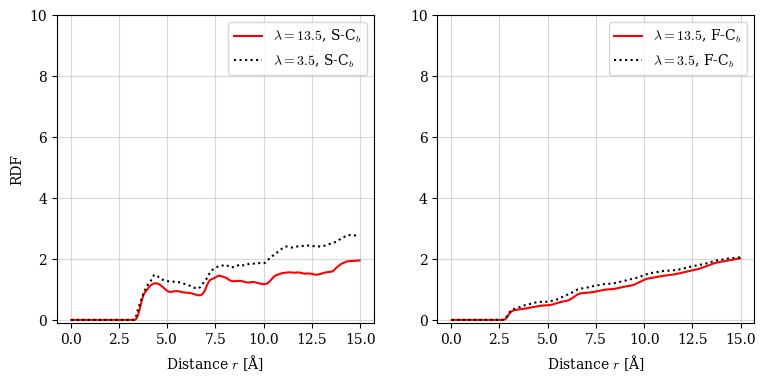

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

upper_limit_y = 10

ax[0].plot(λ13p5_["r"], λ13p5_["RDF S-Cb"], c="red", label = "$\lambda=13.5$, S-C$_b$")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=10)
ax[0].set_ylim([-0.1, upper_limit_y])
ax[0].grid(alpha=0.5)

ax[0].plot(λ3p5_["r"], λ3p5_["RDF S-Cb"], c="k", ls=":", label = "$\lambda=3.5$, S-C$_b$")
ax[0].set_xlabel("Distance $r$ [Å]")
ax[0].set_ylabel("RDF")
ax[0].legend(loc="upper right", fontsize=10)
ax[0].set_ylim([-0.1, upper_limit_y])
ax[0].grid(alpha=0.5)

ax[1].plot(λ13p5_["r"], λ13p5_["RDF F-Cb"], c="red", label = "$\lambda=13.5$, F-C$_b$")
ax[1].set_xlabel("Distance $r$ [Å]")
ax[1].legend(loc="upper right", fontsize=10)
ax[1].set_ylim([-0.1, upper_limit_y])
ax[1].grid(alpha=0.5)

ax[1].plot(λ3p5_["r"], λ3p5_["RDF F-Cb"], c="k", ls=":", label = "$\lambda=3.5$, F-C$_b$")
ax[1].set_xlabel("Distance $r$ [Å]")
ax[1].legend(loc="upper right", fontsize=10)
ax[1].set_ylim([-0.1, upper_limit_y])
ax[1].grid(alpha=0.5)

plt.show()